In [ ]:
## Step one - open up basic datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re, os

In [2]:
dataset_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\datasets\\"
output_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\output\\"

In [3]:
Manifesto_Project_Dataset_version_2019b = "MPDataset_MPDS2019b_stata14.dta"

In [4]:
df = pd.read_stata(dataset_folder+Manifesto_Project_Dataset_version_2019b,convert_categoricals=False)

## Bug - hassle them about it?

# ValueError: 
# Value labels for column party are not unique. These cannot be converted to
# pandas categoricals.

# Either read the file with `convert_categoricals` set to False or use the
# low level interface in `StataReader` to separately read the values and the
# value_labels.

# The repeated labels are:
# --------------------------------------------------------------------------------
# kor: Democratic Party
# grc: Coalition of the Radical Left

# Understood
    #34020: 'grc: Coalition of the Radical Left',2004-2012 SYRIZA
    #34212: 'grc: Coalition of the Radical Left',2012-2015 SYRIZA-EKN
    
original_column_order = df.columns

column_list_minus_party = [x for x in original_column_order if x != 'party']

df = pd.read_stata(dataset_folder+Manifesto_Project_Dataset_version_2019b,columns = column_list_minus_party)

reader = pd.io.stata.StataReader(dataset_folder+Manifesto_Project_Dataset_version_2019b)

header = reader.variable_labels()
labels = reader.value_labels()
party_code = labelling = labels["party"]

df["party"] = pd.read_stata(dataset_folder+Manifesto_Project_Dataset_version_2019b,columns = ["party"],
                            convert_categoricals=False)["party"]
df = df[original_column_order]
df = df.set_index("id_perm")
df[ df.columns[df.dtypes=='object'] ] = df[ df.columns[df.dtypes=='object'] ].astype('category')
df[["coderyear","absseat","totseats","total"]] = df[["coderyear","absseat","totseats","total"]].astype('float32')

In [95]:
df.dtypes.value_counts()

float64           152
float32             4
int32               2
category            1
category            1
category            1
category            1
category            1
category            1
category            1
category            1
category            1
datetime64[ns]      1
category            1
category            1
category            1
category            1
category            1
dtype: int64

In [45]:
df[["date","edate"]]

,date,edate
0,194409,1944-09-17
1,194409,1944-09-17
2,194409,1944-09-17
3,194409,1944-09-17
4,194409,1944-09-17
...,...,...
4487,201405,2014-05-07
4488,201405,2014-05-07
4489,201405,2014-05-07
4490,201405,2014-05-07


In [63]:
# df[ df.columns[df.dtypes=='object'] ].describe()

# id_perm is the permanent unique id
# datasetversion (only one value!) and corpusversion (two values!)
# partyname and partyabbrev not identical (fewer partyabbrev variants!)
# countryname also categorical

# "coderyear","absseat","totseats","total" all integers, but contain some missing values so have to stored as float
# but changed to float32
# per1025 also fits in float32, but feel it should stay with the same dtype as the other per variables



In [97]:
df.to_pickle(dataset_folder+Manifesto_Project_Dataset_version_2019b.replace("dta","zip"),compression='zip')

In [98]:
df

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per608_2,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion
id_perm,,,,,,,,,,,,,,,,,,,,,
JN1LZH,sweden,Sweden,no oecd member,no eu membership,1944-09-17,194409,11220,Communist Party of Sweden,SKP,lef socialist or other left,...,NaN,NaN,NaN,NaN,9.600,1.900,1.900,0.000,1.900,2019b
CMR7F6,sweden,Sweden,no oecd member,no eu membership,1944-09-17,194409,11320,Social Democratic Labour Party,SAP,soc social democratic,...,NaN,NaN,NaN,NaN,-37.800,3.300,2.200,33.400,5.600,2019b
Z6OL6C,sweden,Sweden,no oecd member,no eu membership,1944-09-17,194409,11420,People’s Party,FP,lib liberal,...,NaN,NaN,NaN,NaN,9.500,3.200,6.400,14.300,1.600,2019b
YMKVN2,sweden,Sweden,no oecd member,no eu membership,1944-09-17,194409,11620,Right Party,,con conservative,...,NaN,NaN,NaN,NaN,28.000,1.800,22.800,10.600,0.000,2019b
U4SCRD,sweden,Sweden,no oecd member,no eu membership,1944-09-17,194409,11810,Agrarian Party,,agr agrarian,...,NaN,NaN,NaN,NaN,23.810,0.000,19.048,0.000,4.762,2019b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FYLAK1,south africa,South Africa,no oecd member,no eu membership,2014-05-07,201405,181210,Economic Freedom Fighters,EEF,lef socialist or other left,...,NaN,NaN,NaN,NaN,-27.799,3.918,0.000,18.843,0.187,2019b
SES5XV,south africa,South Africa,no oecd member,no eu membership,2014-05-07,201405,181310,African National Congress,ANC,soc social democratic,...,NaN,NaN,NaN,NaN,-31.926,3.885,0.000,18.412,0.169,2019b
MEH5KV,south africa,South Africa,no oecd member,no eu membership,2014-05-07,201405,181411,Democratic Alliance,DA,lib liberal,...,NaN,NaN,NaN,NaN,-8.120,3.134,0.427,13.675,0.142,2019b


In [ ]:
economic planning (404), corporatism/mixed economy (405), Keynesian demand management (409), nationalization (413), welfare state expansion (504) and labour groups: positive (701)

In [99]:
[x for x in df.columns if any([y in x for y in ["404","405","409","413","504","701"]])]

['per404',
 'per405',
 'per409',
 'per413',
 'per504',
 'per701',
 'per4131',
 'per4132',
 'per5041']

In [ ]:
## reasonable to ask whether this is a 'natural component'
## would also create some automatic weightings

In [224]:
df[["per"+x for x in ["404","405","409","413","504","701"]]].sum(axis=1)

id_perm
JN1LZH     0.000
CMR7F6    31.100
Z6OL6C    14.300
YMKVN2     5.300
U4SCRD     0.000
           ...  
FYLAK1    23.135
SES5XV    23.986
MEH5KV    19.088
NU5PXG    13.022
VKSFXI    10.569
Length: 4492, dtype: float64

In [226]:
manifest_project = df.copy()

In [ ]:
#### European Social Survey

# https://www.europeansocialsurvey.org/data/download.html?r=9

In [227]:
EuropeanSocialSurvey9_2018_v2_integrated = "ESS9e02.dta"

In [228]:
df = pd.read_stata(dataset_folder+EuropeanSocialSurvey9_2018_v2_integrated,convert_categoricals=False)
original_column_order = df.columns

columns_with_non_unique_category_labels = ["edlvdlt","edlvpdlt","isco08","isco08p", "edlvfdlt","edlvmdlt",]

df = pd.read_stata(dataset_folder+EuropeanSocialSurvey9_2018_v2_integrated,
                   columns=[x for x in original_column_order if x not in columns_with_non_unique_category_labels])

object_cols = ["cntry","ctzshipd","cntbrthd","lnghom1","lnghom2","fbrncntc","mbrncntc","region",
              "name","edition","proddate"]

df[object_cols] = df[object_cols].astype('category')

In [229]:
df[columns_with_non_unique_category_labels] = pd.read_stata(dataset_folder+EuropeanSocialSurvey9_2018_v2_integrated,convert_categoricals=False,
              columns=columns_with_non_unique_category_labels)
df = df[original_column_order]

In [230]:
df.dtypes[df.dtypes!='category'].value_counts()

float64    12
int16       2
int8        1
int32       1
dtype: int64

In [231]:
reader = pd.io.stata.StataReader(dataset_folder+EuropeanSocialSurvey9_2018_v2_integrated)

header = reader.variable_labels()
labels = reader.value_labels()
# labelling = labels["edlvdlt"]

In [232]:
## For now, I'll assume that the categories are *supposed* to be merged

df[columns_with_non_unique_category_labels] = df[columns_with_non_unique_category_labels]\
    .apply(lambda x: x.map(labels[x.name]).astype('category').cat.set_categories(pd.Series(labels[x.name]).unique())  )

In [201]:
# [ header[x] for x in columns_with_non_unique_category_labels ]

In [199]:
#
# pd.Series(labels[columns_with_non_unique_category_labels[3]]).value_counts().head(10)

In [200]:
# labels["edlvdlt"]

In [173]:
# "edlvdlt","edlvpdlt","edlvfdlt","edlvmdlt",

# Lithuanian higher education variables

# level 5 and 6 have the same description

# looks like a screwup?
# https://www.europeansocialsurvey.org/docs/round9/survey/ESS9_appendix_a1_e02_0.pdf

#  5: 'Profesinis, Ä¯gytas po pagrindinio iÅ¡silavinimo baigimo (kai profesinio mokymo',
#  6: 'Profesinis, Ä¯gytas po pagrindinio iÅ¡silavinimo baigimo (kai profesinio mokymo',


# "isco08","isco08p",
# Occupation lists - both have these same 9 non-unique strings

# Commissioned armed forces officers              2
# Agricultural, forestry and fishery labourers    2
# Assemblers                                      2
# Food preparation assistants                     2
# Armed forces occupations, other ranks           2
# Police inspectors and detectives                2
# Non-commissioned armed forces officers          2
# Other clerical support workers                  2
# Protective services workers                     2

In [133]:
df[df.columns[df.dtypes=='object']].describe()
# dweight	pspwght	pweight	anweight	prob - look like weights

# inwtm - integer with missing value

# essround - all == 9
# objects - name, edition, proddate - also one unique value
# stratum, psu - integers (medium)
# idno - unique id? - nope - not unique!

,name,edition,proddate,cntry,ctzshipd,cntbrthd,lnghom1,lnghom2,fbrncntc,mbrncntc,region
count,47086,47086,47086,47086,47086,47086,47086,47086,47086,47086,47086
unique,1,1,1,27,144,182,120,143,181,181,306
top,ESS9e02,2,15.06.2020,IT,6666,6666,GER,000,6666,6666,ME0
freq,47086,47086,47086,2745,44802,42419,4694,37138,40609,40776,1200


In [135]:
df[["cntry","ctzshipd","cntbrthd","lnghom1","lnghom2","fbrncntc","mbrncntc","region"]].describe()

## all look like country ids/within country regions

,cntry,ctzshipd,cntbrthd,lnghom1,lnghom2,fbrncntc,mbrncntc,region
count,47086,47086,47086,47086,47086,47086,47086,47086
unique,27,144,182,120,143,181,181,306
top,IT,6666,6666,GER,000,6666,6666,ME0
freq,2745,44802,42419,4694,37138,40609,40776,1200


In [ ]:
## income variables

# https://www.europeansocialsurvey.org/docs/round9/survey/ESS9_appendix_a2_e02_0.pdf

In [218]:
[(x,header[x]) for x in header.keys() if "net" in header[x]]

[('netusoft', 'Internet use, how often'),
 ('netustm', 'Internet use, how much time on typical day, in minutes'),
 ('hinctnta', "Household's total net income, all sources"),
 ('netinum',
  'Your usual [weekly/monthly/annual] net [pay/pensions/social benefits]'),
 ('netilet', 'Which letter describes your net [pay/pensions/social benefits]'),
 ('netifr',
  'Your net [pay/pensions/social benefits] is unfairly low, fair, or unfairly high'),
 ('frlneti',
  'Fair level of [weekly/monthly/annual] net [pay/pensions/social benefits] for yo')]

In [208]:
[(x,header[x]) for x in header.keys() if "hinc" in x]

[('hincsrca', 'Main source of household income'),
 ('hinctnta', "Household's total net income, all sources"),
 ('hincfel', "Feeling about household's income nowadays")]

In [210]:
df['hinctnta'].value_counts()

R - 2nd decile     4285
M - 4th decile     4227
C - 3rd decile     4216
F - 5th decile     4022
J - 1st decile     3839
S - 6th decile     3831
K - 7th decile     3777
P - 8th decile     3602
D - 9th decile     3041
H - 10th decile    2873
Name: hinctnta, dtype: int64

In [217]:
df['hincsrca'].value_counts()

Wages or salaries                                  26145
Pensions                                           13973
Income from self-employment (excluding farming)     2515
Any other social benefits or grants                 1316
Income from other sources                            799
Income from farming                                  678
Unemployment/redundancy benefit                      668
Income from investments, savings etc.                261
Name: hincsrca, dtype: int64

In [216]:
df['iincsrc'].value_counts()

Wages or salaries                                  18458
Pensions                                            8676
No personal income                                  3332
Income from self-employment (excluding farming)     1938
Any other social benefits or grants                 1354
Income from other sources                            739
Unemployment/redundancy benefit                      584
Income from farming                                  437
Income from investments, savings etc.                210
Name: iincsrc, dtype: int64

In [219]:
df['netinum'].value_counts()

20000.0    789
1200.0     737
1500.0     725
1000.0     701
2000.0     668
          ... 
1986.0       1
1987.0       1
1997.0       1
2004.0       1
1627.0       1
Name: netinum, Length: 2027, dtype: int64

In [211]:
[(x,header[x]) for x in header.keys() if "party" in header[x]]

[('prtvblt1',
  'Party voted for in last national election 1, Lithuania (first vote, party)'),
 ('prtvblt2',
  'Party voted for in last national election 2, Lithuania (second vote, party)'),
 ('prtvblt3',
  'Party voted for in last national election 3, Lithuania (third vote, party)'),
 ('wrkprty', 'Worked in political party or action group last 12 months'),
 ('clsprty', 'Feel closer to a particular party than all other parties'),
 ('prtcldat', 'Which party feel closer to, Austria'),
 ('prtcldbe', 'Which party feel closer to, Belgium'),
 ('prtcldbg', 'Which party feel closer to, Bulgaria'),
 ('prtclgch', 'Which party feel closer to, Switzerland'),
 ('prtclbcy', 'Which party feel closer to, Cyprus'),
 ('prtclecz', 'Which party feel closer to, Czechia'),
 ('prtclede', 'Which party feel closer to, Germany'),
 ('prtclgee', 'Which party feel closer to, Estonia'),
 ('prtclfes', 'Which party feel closer to, Spain'),
 ('prtclefi', 'Which party feel closer to, Finland'),
 ('prtclffr', 'Which par

In [213]:
[(x,header[x]) for x in header.keys() if "prt" in x]

# prtv - party voted for
# prtcl

[('trstprt', 'Trust in political parties'),
 ('prtvtcat', 'Party voted for in last national election, Austria'),
 ('prtvtdbe', 'Party voted for in last national election, Belgium'),
 ('prtvtdbg', 'Party voted for in last national election, Bulgaria'),
 ('prtvtgch', 'Party voted for in last national election, Switzerland'),
 ('prtvtbcy', 'Party voted for in last national election, Cyprus'),
 ('prtvtecz', 'Party voted for in last national election, Czechia'),
 ('prtvede1', 'Party voted for in last national election 1, Germany'),
 ('prtvede2', 'Party voted for in last national election 2, Germany'),
 ('prtvtgee', 'Party voted for in last national election, Estonia'),
 ('prtvtees', 'Party voted for in last national election, Spain'),
 ('prtvtdfi', 'Party voted for in last national election, Finland'),
 ('prtvtdfr', 'Party voted for in last national election, France (ballot 1)'),
 ('prtvtcgb', 'Party voted for in last national election, United Kingdom'),
 ('prtvtahr', 'Party voted for in la

In [236]:
df['hinctnta'].cat.categories

# income deciles *going up*  - J is poorest 10%, H is richest 10%

Index(['J - 1st decile', 'R - 2nd decile', 'C - 3rd decile', 'M - 4th decile',
       'F - 5th decile', 'S - 6th decile', 'K - 7th decile', 'P - 8th decile',
       'D - 9th decile', 'H - 10th decile'],
      dtype='object')

In [237]:
deciles = df['hinctnta'].cat.codes.replace(-1,np.nan)

In [238]:
ESS = df.copy()

In [ ]:
### quick, simple version?

## use <income decile> x <


In [241]:
[(x,header[x]) for x in header.keys() if "prtv" in x]

[('prtvtcat', 'Party voted for in last national election, Austria'),
 ('prtvtdbe', 'Party voted for in last national election, Belgium'),
 ('prtvtdbg', 'Party voted for in last national election, Bulgaria'),
 ('prtvtgch', 'Party voted for in last national election, Switzerland'),
 ('prtvtbcy', 'Party voted for in last national election, Cyprus'),
 ('prtvtecz', 'Party voted for in last national election, Czechia'),
 ('prtvede1', 'Party voted for in last national election 1, Germany'),
 ('prtvede2', 'Party voted for in last national election 2, Germany'),
 ('prtvtgee', 'Party voted for in last national election, Estonia'),
 ('prtvtees', 'Party voted for in last national election, Spain'),
 ('prtvtdfi', 'Party voted for in last national election, Finland'),
 ('prtvtdfr', 'Party voted for in last national election, France (ballot 1)'),
 ('prtvtcgb', 'Party voted for in last national election, United Kingdom'),
 ('prtvtahr', 'Party voted for in last national election, Croatia'),
 ('prtvtfhu

In [250]:
vote_vars = ['prtvtcat',
 'prtvtdbe',
 'prtvtdbg',
 'prtvtgch',
 'prtvtbcy',
 'prtvtecz',
#  'prtvede1',
 'prtvede2',
 'prtvtgee',
 'prtvtees',
 'prtvtdfi',
 'prtvtdfr',
 'prtvtcgb',
 'prtvtahr',
 'prtvtfhu',
 'prtvtcie',
 'prtvtcit',
 'prtvblt1',
#  'prtvblt2',
#  'prtvblt3',
 'prtvtalv',
 'prtvtme',
 'prtvtgnl',
 'prtvtbno',
 'prtvtdpl',
 'prtvtcpt',
 'prtvtrs',
 'prtvtcse',
 'prtvtfsi',
 'prtvtdsk']

In [255]:

votes_country_dict = {x:re.sub("Party voted for in last national election\s?\d?, ","",header[x])\
                      .replace('France (ballot 1)',"France")\
                      .replace('Ireland (derived from 1st preference','Ireland')\
                      .replace('Lithuania (first vote, party)','Lithuania')
                      for x in vote_vars}


In [256]:
votes_country_dict

{'prtvtcat': 'Austria',
 'prtvtdbe': 'Belgium',
 'prtvtdbg': 'Bulgaria',
 'prtvtgch': 'Switzerland',
 'prtvtbcy': 'Cyprus',
 'prtvtecz': 'Czechia',
 'prtvede2': 'Germany',
 'prtvtgee': 'Estonia',
 'prtvtees': 'Spain',
 'prtvtdfi': 'Finland',
 'prtvtdfr': 'France',
 'prtvtcgb': 'United Kingdom',
 'prtvtahr': 'Croatia',
 'prtvtfhu': 'Hungary',
 'prtvtcie': 'Ireland',
 'prtvtcit': 'Italy',
 'prtvblt1': 'Lithuania',
 'prtvtalv': 'Latvia',
 'prtvtme': 'Montenegro',
 'prtvtgnl': 'Netherlands',
 'prtvtbno': 'Norway',
 'prtvtdpl': 'Poland',
 'prtvtcpt': 'Portugal',
 'prtvtrs': 'Serbia',
 'prtvtcse': 'Sweden',
 'prtvtfsi': 'Slovenia',
 'prtvtdsk': 'Slovakia'}

In [258]:
ESS['prtvtcit'].value_counts()

Movimento 5 Stelle          503
Partido Democratico (PD)    296
Lega Nord                   265
Forza Italia                 91
Fratelli d'Italia            38
Liberi e Uguali              33
Altro                        20
+ Europa                     13
Potere al popolo              9
Casapound Italia              5
Civia Popolare Lorenzin       5
Noi con l'Italia - UDC        2
SVP-PATT                      1
Italia Europa Insieme         1
Name: prtvtcit, dtype: int64

In [266]:
labels['prtvtcit']

{1: 'Partido Democratico (PD)',
 2: '+ Europa',
 3: 'Italia Europa Insieme',
 4: 'Civia Popolare Lorenzin',
 5: 'SVP-PATT',
 6: 'Liberi e Uguali',
 7: 'Movimento 5 Stelle',
 8: 'Forza Italia',
 9: 'Lega Nord',
 10: "Fratelli d'Italia",
 11: "Noi con l'Italia - UDC",
 12: 'Potere al popolo',
 13: 'Casapound Italia',
 14: 'Altro',
 2147483622: 'Not applicable',
 2147483623: 'Refusal',
 2147483624: "Don't know",
 2147483625: 'No answer'}

In [264]:
manifest_project[ manifest_project["countryname"]=="Italy" ][["edate","party","partyname","partyabbrev","parfam"]].drop_duplicates().tail(50)

,edate,party,partyname,partyabbrev,parfam
id_perm,,,,,
ZV25YX,2001-05-13,32629,House of Freedom,,con conservative
1GXOM7,2001-05-13,32710,National Alliance,AN,nat nationalist
IJI9T3,2001-05-13,32720,Northern League,LN,nat nationalist
TZUW2A,2001-05-13,32901,European Democracy,DE,sip special issue
23POG9,2001-05-13,32902,List Di Pietro - Italy of Values,IdV,lib liberal
2OWUUW,2006-04-10,32110,Green Federation,FdV,eco ecologist
G9G5IU,2006-04-10,32212,Communist Refoundation Party,PRC,lef socialist or other left
G7MW3V,2006-04-10,32213,Party of Italian Communists,PdCI,lef socialist or other left
OUX4F8,2006-04-10,32221,Rose in the Fist,RnP,lef socialist or other left


In [272]:
big_parties_by_country_dict = {}
for vote_var in votes_country_dict.keys():
    big_parties_by_country_dict[ votes_country_dict[vote_var] ] = list(ESS[vote_var].value_counts()[ESS[vote_var].value_counts()>=100].index)
big_parties_by_country_dict

{'Austria': ['Ã\x96VP', 'SPÃ\x96', 'FPÃ\x96', 'GrÃ¼ne'],
 'Belgium': ['N-VA', 'PS', 'CD&V', 'MR'],
 'Bulgaria': ['Grazhdani za evropeiÌ\x86sko razvitie na Bulgariya (GERB)',
  'Balgarska sotsialisticheska partiya (BSP)',
  'Dvizhenie za prava i svobodi (DPS)'],
 'Switzerland': ['Social Democratic Party / Socialist Party',
  'FDP. The Liberals',
  "Swiss People's Party"],
 'Cyprus': ['Democratic Rally (DISY)'],
 'Czechia': ['ANO 2011',
  'ODS',
  'Ä\x8cSSD',
  'Ä\x8ceskÃ¡ pirÃ¡tskÃ¡ strana',
  'KSÄ\x8cM'],
 'Germany': ['Christian Democratic Union/Christian Social Union (CDU/CSU)',
  'Social Democratic Party (SPD)',
  'Alliance 90/The Greens (BÃ¼ndnis 90/Die GrÃ¼nen)',
  'Free Democratic Party (FDP)',
  'The Left (Die Linke)',
  'Alternative for Germany (AFD)'],
 'Estonia': ['Eesti Reformierakond',
  'Eesti Keskerakond',
  'Sotsiaaldemokraatlik Erakond',
  'Erakond Isamaa ja Res Publica Liit'],
 'Spain': ['PSOE', 'PP', 'Unidas Podemos', 'VOX'],
 'Finland': ['The National Coalition Party'

In [291]:


# pd.Series(flatten([x for x in big_parties_by_country_dict.values()])).values

In [305]:
ESS_big_parties_to_CMP_parties = {'Ã\x96VP':42520, 'SPÃ\x96':42320, 'FPÃ\x96':42420, 'GrÃ¼ne':42110,#Austria
 'N-VA':21916, 'PS':21322, 'CD&V':21521,  'MR':21426,#Belgium
 'Grazhdani za evropeiÌ\x86sko razvitie na Bulgariya (GERB)':80510,
       'Balgarska sotsialisticheska partiya (BSP)':80220,
       'Dvizhenie za prava i svobodi (DPS)':80951,#Bulgaria 
       'Social Democratic Party / Socialist Party':43320, 'FDP. The Liberals':43420,
           "Swiss People's Party":43810,#Swizterland
       'Democratic Rally (DISY)':55711,#Cyprus
       'ANO 2011':82430,'ODS':82413, 'Ä\x8cSSD':82320,
         'Ä\x8ceskÃ¡ pirÃ¡tskÃ¡ strana':82953, 'KSÄ\x8cM':82220,#Czechia
       'Christian Democratic Union/Christian Social Union (CDU/CSU)':41521,
           'Social Democratic Party (SPD)':41320,
           'Alliance 90/The Greens (BÃ¼ndnis 90/Die GrÃ¼nen)':41113,
           'Free Democratic Party (FDP)':41420, 'The Left (Die Linke)':41223,
           'Alternative for Germany (AFD)':41953,#Germany
       'Eesti Reformierakond':83430,
       'Eesti Keskerakond':83411, 'Sotsiaaldemokraatlik Erakond':83410,
       'Erakond Isamaa ja Res Publica Liit':83611,#Estonia
       'PSOE':33320, 'PP':33610,'Unidas Podemos':33210, 'VOX':np.nan,#Spain
       'The National Coalition Party':14620,
           'The Centre Party':14810, 'Social Democratic Party':14320, 'Green League':14110,
           'True Finns':14820,#Finland
     'LREM (LA RÃ\x89PUBLIQUE EN MARCHE)':31425,
       'LR (LES RÃ\x89PUBLICAINS)':31626, 'PS (Parti Socialiste)':31320,
       'FN (Front National)':31720,#France
         'Conservative':51620, 'Labour':51320, 'Liberal Democrat':51421,#United Kingdom
 'Narodna koalicija - SDP, HNS, HSU, HSS':81032,  'Hrvatska demokratska zajednica (HDZ)':81711,#Croatia
       'Fidesz (Fidesz Magyar PolgÃ¡ri PÃ¡rt)':86421,
       'Jobbik (Jobbik MagyarorszÃ¡gÃ©rt Mozgalom)':86710,
       'MSZP (Magyar Szocialista PÃ¡rt)':86320,#Hungary
 'Fine Gael':53520, 'Fianna FÃ¡il':53620,
       'Independent':53981, 'Sinn FÃ©in':53951,#Ireland
 'Movimento 5 Stelle':32956,
       'Partido Democratico (PD)':32440, 'Lega Nord':32720,#Italy
       'Lithuanian Peasant and Greens Union (LVZS)':88820,
       'Homeland Union - Lithuanian Christian Democrats (TS-LKD)':88621,
       'Lithuanian Social Democratic Party (LSDP)':88320,#Lithuania
 
       'DPS - Milo Ä\x90ukanoviÄ\x87':91220,#Montenegro
 
       "People's Party for Freedom and Democracy":22955, "Democrats '66":22330,
       'Green Left':22110, 'Christian Democratic Appeal':22521,#Netherlands
 'HÃ¸yre':12620,
       'Arbeiderpartiet':12320, 'Fremskrittspartiet':12951,#Norway
       'Prawo i SprawiedliwoÅ\x9bÄ\x87':92436, 'Platforma Obywatelska':92435,#Poland
       'PS - Partido Socialista':35311,
       'PPD-PSD/CDS-PP - Portugal Ã\xa0 Frente':35313,#Portugal
       'Aleksandar VuÄ\x8diÄ\x87-Srbija pobeÄ\x91uje':95071,#Serbia
       'Socialdemokraterna':11320, 'Moderata samlingspartiet':11620, 'Centern':11810,
       'Sverigedemokraterna':11710, 'VÃ¤nsterpartiet':11220,#Sweden
       'SDS - Slovenska demokratska stranka':97330,
       'LMÅ\xa0 - Lista Marjana Å\xa0arca':np.nan,#Slovenia
 'Smer â\x80\x93 SD':96423#Slovakia]
}

In [290]:
manifest_project[ manifest_project["countryname"]=="Italy" ][["edate","party","partyname","partyabbrev","parfam"]].drop_duplicates().describe(include='all')

,edate,party,partyname,partyabbrev,parfam
count,178,178.000000,178,178,178
unique,19,NaN,64,57,9
top,2006-04-10 00:00:00,NaN,Christian Democrats,PSI,soc social democratic
freq,16,NaN,12,12,37
first,1946-06-02 00:00:00,NaN,NaN,NaN,NaN
last,2018-03-04 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,32447.320225,NaN,NaN,NaN
std,NaN,232.631261,NaN,NaN,NaN
min,NaN,32021.000000,NaN,NaN,NaN
25%,NaN,32310.000000,NaN,NaN,NaN


In [295]:
ESS["pspwght"]

0        0.218111
1        0.413473
2        2.270293
3        0.386483
4        1.032102
           ...   
47081    0.654094
47082    0.730359
47083    0.363919
47084    0.632651
47085    0.708603
Name: pspwght, Length: 47086, dtype: float64

In [296]:
deciles

0        2.0
1        4.0
2        8.0
3        5.0
4        0.0
        ... 
47081    4.0
47082    0.0
47083    NaN
47084    0.0
47085    NaN
Length: 47086, dtype: float64

In [334]:
def weighted_mean(x, **kws):
    val, weight = map(np.asarray, zip(*x))
    val, weight = val[~np.isnan(val)],weight[~np.isnan(val)]
    return (val * weight).sum() / weight.sum()

flatten = lambda l: [item for sublist in l for item in sublist]

In [298]:
ESS["income_deciles_wts"] = list(zip(deciles,ESS["pspwght"]))

In [304]:
ESS[list(votes_country_dict.keys())].notnull().sum(axis=1).sort_values()

# no overlap between different elections!

47085    0
18400    0
18399    0
18398    0
18396    0
        ..
20181    1
20172    1
20171    1
20209    1
23542    1
Length: 47086, dtype: int64

In [308]:
ESS_big_party_list_overlap = [x for x in ESS_big_parties_to_CMP_parties.keys() if pd.notnull(ESS_big_parties_to_CMP_parties[x])]

In [317]:
party_voted_in_last_nat_election = ESS[list(votes_country_dict.keys())].fillna(axis=1,method ='ffill')[list(votes_country_dict.keys())[-1]]

In [320]:
party_voted_in_last_nat_election.loc[party_voted_in_last_nat_election.apply(lambda x: x not in ESS_big_party_list_overlap)] = np.nan

In [321]:
party_voted_in_last_nat_election.value_counts()

Aleksandar VuÄiÄ-Srbija pobeÄuje    666
Labour                                 656
Conservative                           638
ÃVP                                   604
SPÃ                                   573
                                      ... 
Alternative for Germany (AFD)          111
KSÄM                                  108
MSZP (Magyar Szocialista PÃ¡rt)        105
FN (Front National)                    103
Fremskrittspartiet                     102
Name: prtvtdsk, Length: 80, dtype: int64

In [326]:
ESS[list(votes_country_dict.keys())].notnull().idxmax(axis=1).map(votes_country_dict).loc[party_voted_in_last_nat_election.apply(lambda x: x not in ESS_big_party_list_overlap)] = np.nan

In [331]:
voting_country = ESS[list(votes_country_dict.keys())].notnull().idxmax(axis=1).map(votes_country_dict)
voting_country.loc[party_voted_in_last_nat_election.apply(lambda x: x not in ESS_big_party_list_overlap)] = np.nan

In [329]:
party_voted_in_last_nat_election.apply(lambda x: x in ['Ã\x96VP', 'SPÃ\x96', 'FPÃ\x96', 'GrÃ¼ne']).sum()

1611

In [333]:
voting_country.value_counts().shape

(26,)

In [340]:
weighted_income_deciles_by_party = ESS["income_deciles_wts"].groupby(party_voted_in_last_nat_election).agg(weighted_mean).sort_values().reset_index()
weighted_income_deciles_by_party.columns = ["party","mean_inc_decile"]
weighted_income_deciles_by_party

,party,mean_inc_decile
0,Balgarska sotsialisticheska partiya (BSP),2.875343
1,KSÄM,2.950687
2,Dvizhenie za prava i svobodi (DPS),3.060407
3,Sinn FÃ©in,3.438265
4,Lithuanian Peasant and Greens Union (LVZS),3.541466
...,...,...
75,Alliance 90/The Greens (BÃ¼ndnis 90/Die GrÃ¼nen),5.942228
76,Democrats '66,5.950335
77,Moderata samlingspartiet,5.993134
78,The National Coalition Party,6.267964


In [343]:
weighted_income_deciles_by_party["party"].map(ESS_big_parties_to_CMP_parties)

0     80220.0
1     82220.0
2     80951.0
3     53951.0
4     88820.0
       ...   
75    41113.0
76    22330.0
77    11620.0
78    14620.0
79    22955.0
Name: party, Length: 80, dtype: float64

In [352]:
manifest_project.set_index("party").loc[ weighted_income_deciles_by_party["party"].map(ESS_big_parties_to_CMP_parties) ]["partyname"].value_counts().head(86)

Conservative Party                                                                              39
Centre Party                                                                                    26
Socialist Party                                                                                 26
Social Democratic Labour Party                                                                  23
Labour Party                                                                                    22
                                                                                                ..
Popular Democratic Party                                                                         2
ANO 2011                                                                                         2
Federation of Young Democrats                                                                    2
Federation of Young Democrats - Hungarian Civic Party - Hungarian Democratic Forum- Alliance     2
Lithuanian

In [355]:
manifest_project.sort_values(by="edate").groupby("party").first()

,country,countryname,oecdmember,eumember,edate,date,partyname,partyabbrev,parfam,coderid,...,per608_2,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion
party,,,,,,,,,,,,,,,,,,,,,
11110,sweden,Sweden,oecd member,no eu membership,1988-09-18,198809,Green Ecology Party,MP,eco ecologist,228,...,0.000,0.0,1.207,0.000,-18.400,1.400,0.000,11.300,0.000,2019b
11220,sweden,Sweden,no oecd member,no eu membership,1944-09-17,194409,Communist Party of Sweden,SKP,lef socialist or other left,117,...,0.000,0.0,2.778,0.278,9.600,1.900,1.900,0.000,1.900,2019b
11320,sweden,Sweden,no oecd member,no eu membership,1944-09-17,194409,Social Democratic Labour Party,SAP,soc social democratic,117,...,0.000,0.0,0.184,0.000,-37.800,3.300,2.200,33.400,5.600,2019b
11420,sweden,Sweden,no oecd member,no eu membership,1944-09-17,194409,People’s Party,FP,lib liberal,117,...,0.688,0.0,0.000,0.000,9.500,3.200,6.400,14.300,1.600,2019b
11520,sweden,Sweden,oecd member,no eu membership,1985-09-15,198509,Christian Democratic Coalition,KDS,chr christian democrat,not applicable,...,0.000,0.0,0.000,0.000,-4.545,0.000,9.091,20.455,2.273,2019b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181310,south africa,South Africa,no oecd member,no eu membership,1994-04-29,199404,African National Congress,ANC,soc social democratic,310,...,NaN,NaN,NaN,NaN,-11.374,4.265,0.474,13.744,0.474,2019b
181410,south africa,South Africa,no oecd member,no eu membership,1994-04-29,199404,Democratic Party,DP,lib liberal,310,...,NaN,NaN,NaN,NaN,11.069,1.145,5.344,6.107,1.527,2019b
181411,south africa,South Africa,no oecd member,no eu membership,2004-04-14,200404,Democratic Alliance,DA,lib liberal,310,...,NaN,NaN,NaN,NaN,-18.466,0.313,1.565,26.135,0.000,2019b


In [ ]:
#### FILTER BY PROGRAMME TYPE!

In [361]:
cmp_overlap_df = manifest_project[manifest_project["party"].apply(lambda x: x in ESS_big_parties_to_CMP_parties.values())].sort_values(by="edate").groupby("party").last()

In [409]:
cmp_overlap_df["edate"].sort_values()

party
22955   1994-05-03
86320   2010-04-11
21322   2010-06-13
21426   2010-06-13
35313   2011-06-05
           ...    
11810   2018-09-09
11710   2018-09-09
11620   2018-09-09
11320   2018-09-09
11220   2018-09-09
Name: edate, Length: 80, dtype: datetime64[ns]

In [364]:
cmp_overlap_df.loc[22955].values

array(['netherlands', 'Netherlands', 'oecd member', 'eu member',
       Timestamp('1994-05-03 00:00:00'), 199405, 'Union 55+', 'Unie 55+',
       'sip special issue', 326, 'version 4', 2016.0, 0.94, 0.471, 0.9,
       'original vote figure', nan, 1.0, 150.0, 'regular programme',
       'Update 2016a', '2019-2', 229.0, 0.0, 0.0, 0.0, 0.0, 2.183, 0.0,
       0.0, 4.803, 0.0, 0.0, 0.0, 0.437, 1.747, 0.0, 0.0, 0.0, 0.873,
       2.62, 0.0, 8.734, 1.31, 3.057, 0.873, 0.437, 0.0, 0.0, 0.0, 0.873,
       0.873, 1.31, 2.183, 0.0, 0.0, 1.747, 0.0, 0.873, 2.62, 0.0, 8.734,
       16.594, 0.437, 4.803, 0.0, 1.747, 0.0, 0.0, 0.0, 13.974, 1.747,
       0.437, 4.803, 0.873, 0.0, 0.0, 0.0, 0.0, 8.297, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, n

In [374]:
cmp_overlap_df = cmp_overlap_df.sort_index()

In [375]:
manifesto_redist = cmp_overlap_df[["per"+x for x in ["404","405","409","413","504","701"]]].sum(axis=1)

In [370]:
weighted_income_deciles_by_party["party"] = weighted_income_deciles_by_party["party"].map(ESS_big_parties_to_CMP_parties)
weighted_income_deciles_by_party = weighted_income_deciles_by_party.set_index("party")

In [377]:
weighted_income_deciles_by_party = weighted_income_deciles_by_party["mean_inc_decile"].sort_index()

In [379]:
cmp_overlap_df["weighted_income_deciles"] = weighted_income_deciles_by_party
cmp_overlap_df["manifesto_redist"] = manifesto_redist

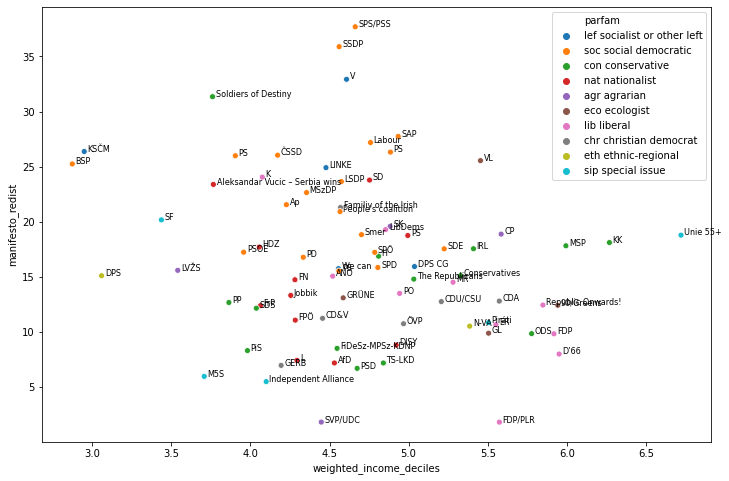

In [407]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = cmp_overlap_df,x="weighted_income_deciles",y="manifesto_redist",
                hue="parfam");

# make size = percentage of the vote? "pervote"

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']), fontsize=8)

label_point(cmp_overlap_df["weighted_income_deciles"],
            cmp_overlap_df["manifesto_redist"],
            cmp_overlap_df["partyabbrev_filled"], plt.gca())  

In [383]:
cmp_overlap_df["parfam"].value_counts()

soc social democratic          19
con conservative               14
nat nationalist                11
lib liberal                    10
chr christian democrat          6
sip special issue               5
lef socialist or other left     5
agr agrarian                    4
eco ecologist                   4
eth ethnic-regional             2
mi missing information          0
div divers alliance             0
Name: parfam, dtype: int64

In [393]:
cmp_overlap_df["partyabbrev"].value_counts().head(60)

                    8
PS                  4
FiDeSz-MPSz-KDNP    1
Piráti              1
FPÖ                 1
FN                  1
FDP/PLR             1
FDP                 1
SAP                 1
SD                  1
SDE                 1
D’66                1
SDS                 1
SF                  1
SK                  1
DPS CG              1
DPS                 1
DISY                1
SPD                 1
SPS/PSS             1
Conservatives       1
SPÖ                 1
SSDP                1
CP                  1
CDU/CSU             1
SVP/UDC             1
CDA                 1
CD&V                1
Smer                1
PiS                 1
FrP                 1
BSP                 1
KSČM                1
M5S                 1
MR                  1
LibDems             1
MSP                 1
MSzDP               1
Labour              1
LVŽS                1
N-VA                1
LSDP                1
LINKE               1
ODS                 1
L                   1
PD        

In [404]:
# cmp_overlap_df.loc[cmp_overlap_df["partyabbrev"]=="","partyabbrev"] = cmp_overlap_df[cmp_overlap_df["partyabbrev"]==""]["partyname"]

cmp_overlap_df["partyabbrev_filled"] = cmp_overlap_df["partyabbrev"].astype('object')
cmp_overlap_df.loc[cmp_overlap_df["partyabbrev"]=="","partyabbrev_filled"] = cmp_overlap_df[cmp_overlap_df["partyabbrev"]==""]["partyname"].astype('object')

In [408]:
# cmp_overlap_df.loc[cmp_overlap_df["partyabbrev"]=="","partyabbrev_filled"]

In [11]:
df.columns[-10:]

Index(['per608_2', 'per608_3', 'per703_1', 'per703_2', 'rile', 'planeco',
       'markeco', 'welfare', 'intpeace', 'datasetversion'],
      dtype='object')

In [26]:
## Factor Analysis on the manifesto project variables
# df.shape

(4492, 173)

In [114]:
value_vars = [x for x in df.columns if re.match("per(\d+|uncod)|rile|planeco|markeco|welfare|intpeace",x)]
# rile, planeco, markeco, welfare, intpeace
MCP_vals = df[value_vars]
MCP_vals = MCP_vals.fillna(MCP_vals.mean())


In [115]:
# df["peruncod"]
# percentage uncoded
MCP_vals.columns = [header[x]+"("+x.replace("per","")+")" for x in MCP_vals.columns]
MCP_vals.columns

Index(['percent of uncoded quasi-sentences (000)(uncod)',
       'foreign special +(101)', 'foreign special -(102)',
       'anti-imperalism(103)', 'military +(104)', 'military -(105)',
       'peace(106)', 'internationalism +(107)', 'europe +(108)',
       'internationalism -(109)',
       ...
       'sub2: multiculturalism: general -(608_1)',
       'sub2: multiculturalism: immigrants assimilation(608_2)',
       'sub2: multiculturalism: indigenous rights -(608_3)',
       'sub2: agriculture and farmers +(703_1)',
       'sub2: agriculture and farmers -(703_2)',
       'right-left ideological index(rile)', 'planned economic index(planeco)',
       'market economic index(markeco)',
       'party policy positioning on welfare(welfare)',
       'international peace index(intpeace)'],
      dtype='object', length=148)

In [116]:
Treatment = "Manifesto Project Decomposition"

In [117]:
output_subfolder = output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

In [118]:
from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA, NMF, TruncatedSVD, FastICA, FactorAnalysis, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# normalise data (subtract out the mean, divide through by standard deviation)

decomp_index = MCP_vals.index
decomp_columns = MCP_vals.columns
clean_feature_set_std = StandardScaler().fit_transform(MCP_vals.values )
decomp_std = pd.DataFrame(   clean_feature_set_std,
                             columns = MCP_vals.columns,
                             index   = MCP_vals.index      )

In [119]:
import unicodedata
import string
valid_filename_chars = "-_.() %s%s" % (string.ascii_letters, string.digits)
def clean_filename(filename, whitelist=valid_filename_chars, replace=' ', char_limit = 30):
    import warnings
    # replace spaces
    for r in replace:
        filename = filename.replace(r,'_')
    
    # keep only valid ascii chars
    cleaned_filename = unicodedata.normalize('NFKD', filename).encode('ASCII', 'ignore').decode()
    
    # keep only whitelisted chars
    cleaned_filename = ''.join(c for c in cleaned_filename if c in whitelist)
    if len(cleaned_filename)>char_limit:

        warnings.warn("Warning, filename truncated because it was over {}. Filenames may no longer be unique".format(char_limit))
        # print("Warning, filename truncated because it was over {}. Filenames may no longer be unique".format(char_limit))
    return cleaned_filename[:char_limit]    

def create_subdir(base_dir, subdir, char_limit=50):
    output_subfolder = base_dir + os.sep + clean_filename(subdir, char_limit=char_limit) + os.sep
    if not os.path.exists( output_subfolder ):
        os.makedirs( output_subfolder )
    return output_subfolder

def display_components(n_components, decomp, cols, BES_decomp, manifest=None, 
                       save_folder = False, show_first_x_comps=4,
                       show_histogram=True, flip_axes=True, max_comp=20, max_var_per_comp = 30):
    
    if hasattr(decomp, 'coef_'):
        decomp_components = decomp.coef_
    elif hasattr(decomp, 'components_'):
        decomp_components = decomp.components_
    else:
        raise ValueError('no component attribute in decomp')    

    # hardcoded at 20?    
    n_comps = min(n_components,max_comp)
    comp_labels = {}
    comp_dict = {}

    for comp_no in range(0,n_comps):

        fig, axes = plt.subplots(ncols=1+show_histogram)
        
        comp = pd.DataFrame( decomp_components[comp_no], index = cols, columns = ["components_"] )
        comp["comp_absmag"] = comp["components_"].abs()
        comp = comp.sort_values(by="comp_absmag",ascending=True)        
        
        if show_histogram:
            comp_ax = axes[0]
            
            hist_ax = axes[1]
            hist_ax.set_xlabel("abs. variable coeffs")
            hist_ax.set_title("Histogram of abs. variable coeffs")
            comp["comp_absmag"].hist( bins=30, ax=hist_ax, figsize=(10,6) )
            
        else:
            comp_ax = axes
            
        # set top abs_mag variable to label
        comp_labels[comp_no] = comp.index[-1:][0] # last label (= highest magnitude)
        # if top abs_mag variable is negative
     
        if flip_axes & (comp[-1:]["components_"].values[0] < 0):

            comp["components_"]         = -comp["components_"]
            decomp_components[comp_no]  = -decomp_components[comp_no]
            BES_decomp[comp_no]         = -BES_decomp[comp_no]

        title = "Comp. "+str(comp_no)+" (" + comp.index[-1:][0] + ")"
        comp_labels[comp_no] = title            
        if manifest is not None:
            dataset_description = manifest["Friendlier_Description"].values[0]
            comp_ax.set_title( dataset_description + "\n" + title )
        else:
            comp_ax.set_title( title )
        comp_ax.set_xlabel("variable coeffs")
        xlim = (min(comp["components_"].min(),-1) , max(comp["components_"].max(),1) )
        comp["components_"].tail(max_var_per_comp).plot( kind='barh', ax=comp_ax, figsize=(10,6), xlim=xlim )
        if manifest is not None:
            dataset_citation = "Source: " + manifest["Citation"].values[0]
            comp_ax.annotate(dataset_citation, (0,0), (0, -40),
                             xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)            

        if (save_folder != False):
            fname = save_folder + clean_filename(title) + ".png"
            fig.savefig( fname, bbox_inches='tight' )

        comp_dict[comp_no] = comp
        # show first x components
        if (comp_no >= min(show_first_x_comps,n_components)):
            plt.close()

        
    return (BES_decomp, comp_labels, comp_dict)
    

def display_pca_data(n_components, decomp, BES_std, y=[]):    
    
    figsz = (16,3)
    
    f, axs = plt.subplots( 1, 4, figsize=figsz )

    axno = 0
    
    if hasattr(decomp, 'explained_variance_ratio_'):
        print('explained variance ratio (first 30): %s'
              % str(decomp.explained_variance_ratio_[0:30]) )
        
    if hasattr(decomp, 'explained_variance_'):
        print('explained variance (first 30): %s'
              % str(decomp.explained_variance_[0:30]) )

        axs[axno].plot( range(1,n_components+1), decomp.explained_variance_, linewidth=2)
        # ,figsize = figsz)
        axs[axno].set_xlabel('n_components')
        axs[axno].set_ylabel('explained_variance_')
        axs[axno].set_title('explained variance by n_components')
        axno = axno + 1
        
    if hasattr(decomp, 'noise_variance_'): 
        if isinstance(decomp.noise_variance_, float):
            print('noise variance: %s'
                  % str(decomp.noise_variance_) )
        
    if hasattr(decomp, 'score'):
        if len(y)==0:
            print('average log-likelihood of all samples: %s'
                  % str(decomp.score(BES_std)) )
        else:
            print('mean classification accuracy (harsh if many cats.): %s'
                  % str(decomp.score(BES_std, y)) )
        
    if hasattr(decomp, 'score_samples') and not np.isinf( decomp.score(BES_std) ):
        pd.DataFrame( decomp.score_samples(BES_std) ).hist(bins=100,figsize = figsz, ax=axs[axno])
        axs[axno].set_xlabel('log likelihood')
        axs[axno].set_ylabel('frequency')
        axs[axno].set_title('LL of samples')
        axno = axno + 1

    if hasattr(decomp, 'n_iter_'):
        print('number of iterations: %s'
              % str(decomp.n_iter_) )
        
    if hasattr(decomp, 'loglike_'):
        axs[axno].plot( decomp.loglike_, linewidth=2) # ,figsize = figsz)
        axs[axno].set_xlabel('n_iter')
        axs[axno].set_ylabel('log likelihood')
        axs[axno].set_title('LL by iter')
        axno = axno + 1

    if hasattr(decomp, 'error_'):

        axs[axno].plot( decomp.error_, linewidth=2, figsize = figsz)
        axs[axno].set_xlabel('n_iter')
        axs[axno].set_ylabel('error')
        axs[axno].set_title('LL by iter')
        axno = axno + 1

In [120]:
%%time
# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = decomp_std.shape[1]
n_components = 10
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

# decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(decomp_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = decomp_index)


[dict_learning] .

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


..

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


.

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


.

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


..

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished



Wall time: 1min 41s


In [121]:
import pickle
# treatdir = BES_data_folder+Treatment
# subdir = BES_data_folder+Treatment+decomp_method
load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method
    # create dir, save decomp object, BES_decomp, BES_std    
    if not os.path.exists(subdir): os.makedirs(subdir)
    with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
    BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
    decomp_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
else: # LOAD decomp results (default is SAVE)
    decomp_method = load_suff
    subdir = output_subfolder + os.sep + decomp_method    
    fname = subdir + os.sep + decomp_method
    if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
    # load decomp object, BES_decomp, BES_std, n_components
    with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
    BES_decomp = pd.read_hdf(fname+".hdf")
    decomp_std    = pd.read_hdf(fname+"_std"+".hdf")
    n_components = decomp.components_.shape[0] 

In [122]:
# display_pca_data(n_components, decomp, decomp_std)

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Warning, filename truncated because it was over 30. Filenames may no longer be unique


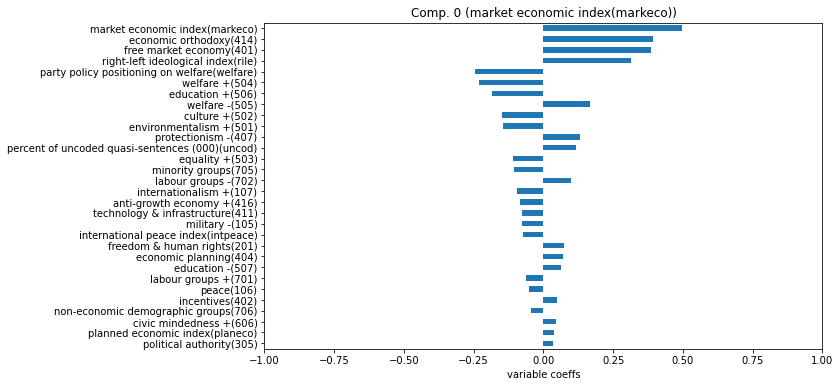

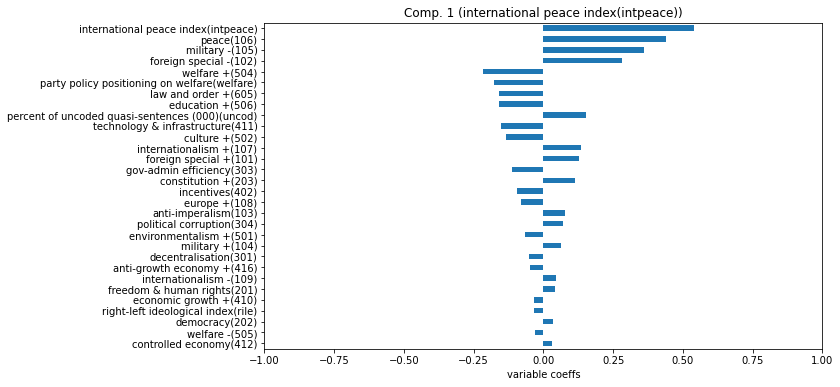

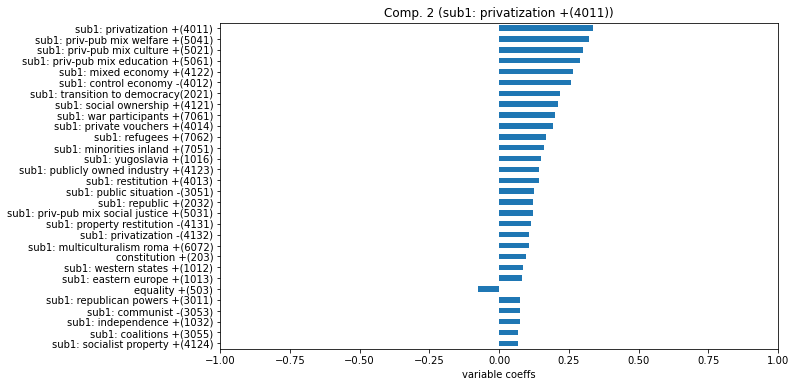

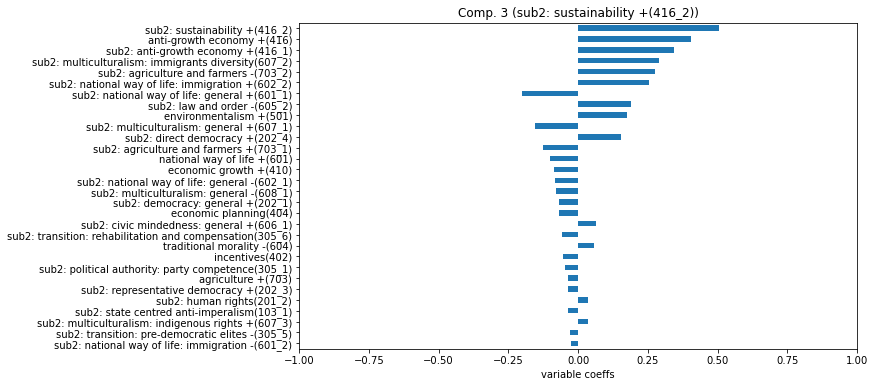

In [123]:
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          decomp_columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)

In [87]:
header

{'country': 'country code',
 'countryname': 'English country name',
 'oecdmember': 'OECD Membership status',
 'eumember': 'EU Membership status',
 'edate': 'election date',
 'date': 'election date (YYYYMM)',
 'party': 'CMP party code',
 'partyname': 'Name of party (english)',
 'partyabbrev': 'party abbreviation',
 'parfam': 'party family membership',
 'coderid': 'unique coder identification number',
 'manual': 'version of coder manual used in training',
 'coderyear': 'year of last coder training',
 'testresult': "coder reliability (Krippendorf's Alpha)",
 'testeditsim': 'coder reliability (edit similarity)',
 'pervote': 'percent of vote',
 'voteest': 'orig or estimated figure',
 'presvote': 'percent of vote in presidential election',
 'absseat': 'absolute number of seats',
 'totseats': 'total number of seats',
 'progtype': 'manifesto document type',
 'datasetorigin': 'dataset (version) in which the datapoint appeared',
 'corpusversion': 'manifesto corpus version used to generate the co

In [74]:
subdir

'C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\output\\Manifesto Project Decomposition\\PCA'

In [ ]:
### Party Voter Dataset

# Party Voter Dataset

# Description
# MARPOR compiled a combined data set which merges data from the Manife sto Data Collection with survey data. With this combined Party - Voter Data Set, we provide new possibilities for the study of the quality of representation. For the first time it is possible to address the question of how well voters (party supporters or un aligned citizens) are represented by parties on a broad empirical basis. This is possible as the combined data set provides information on the relationship between voters and parties on the individual level. The data is available cross - nationally and over - time. Using survey and election data, MARPOR therefore provides the relevant information to assess questions of representation and of the functioning of the delegation mechanisms from the represented voters to the representing parties in a broad comparative perspective.

# Update 05.09.2018: We have added the unaligned voters to the Party Voter Dataset. The previous versions published here did not include them.



# https://manifestoproject.wzb.eu/datasets/pvds

In [8]:
pvds_elections = pd.read_stata(dataset_folder + "pvds_elections.dta")
pvds_elections

,country,edate,marpor_year,N_parties,rile_min,rile_max,rile_med,rile_pol,N_voter,selfrile_min,selfrile_max,selfrile_med,selfrile_pol
0,sweden,1998-09-21,1998.0,7.0,-36.111111,37.425148,4.790419,73.536255,1952.0,1.0,9.0,5.0,8.0
1,norway,1997-09-16,1997.0,7.0,-25.362534,23.478260,-7.896528,48.840794,4020.0,1.0,9.0,5.0,8.0
2,denmark,1998-03-11,1998.0,10.0,-38.834949,41.975307,6.602664,80.810257,0.0,NaN,NaN,NaN,NaN
3,iceland,1999-05-08,1999.0,5.0,-32.500000,18.181818,-9.767442,50.681816,2968.0,1.0,9.0,5.0,8.0
4,belgium,1999-06-13,1999.0,10.0,-19.762846,5.555555,-7.208835,25.318401,7350.0,1.0,9.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,ireland,1987-02-17,1987.0,5.0,-28.011204,7.885304,-12.750000,35.896507,7077.0,1.0,9.0,5.0,8.0
269,ireland,1989-06-15,1989.0,6.0,-32.357246,-2.916667,-10.850211,29.440580,10751.0,1.0,9.0,5.0,8.0
270,ireland,1992-11-25,1992.0,6.0,-26.712328,19.277109,-7.177182,45.989437,10890.0,1.0,9.0,5.0,8.0
271,ireland,1997-06-06,1997.0,7.0,-26.137304,19.615911,-5.948718,45.753216,6783.0,1.0,9.0,5.0,8.0


In [15]:
pvds_parties = pd.read_stata(dataset_folder + "pvds_parties.dta", columns = ['country', 'edate', 'marpor_year', 'rile', 'selfrile_min',
       'selfrile_max', 'selfrile_med', 'selfrile_pol', 'N_voter'])

pvds_parties["party"] = pd.read_stata(dataset_folder + "pvds_parties.dta",
                                      convert_categoricals=False, columns = ['party'])["party"]
                             
                             
                             #)
pvds_parties = pvds_parties[['country', 'edate', 'marpor_year', 'party', 'rile', 'selfrile_min',
       'selfrile_max', 'selfrile_med', 'selfrile_pol', 'N_voter']]
pvds_parties

# non-unique category
# cze: kds christian democratic party

,country,edate,marpor_year,party,rile,selfrile_min,selfrile_max,selfrile_med,selfrile_pol,N_voter
0,sweden,1998-09-21,1998.0,-99.0,NaN,NaN,NaN,NaN,NaN,1107.0
1,sweden,1998-09-21,1998.0,11110.0,-36.111111,1.0,6.0,3.0,5.0,40.0
2,sweden,1998-09-21,1998.0,11220.0,-35.951660,1.0,7.0,3.0,6.0,107.0
3,sweden,1998-09-21,1998.0,11320.0,-3.515625,1.0,9.0,3.0,8.0,326.0
4,sweden,1998-09-21,1998.0,11420.0,14.285714,3.0,8.0,6.0,5.0,44.0
...,...,...,...,...,...,...,...,...,...,...
1797,ireland,2002-05-17,2002.0,53320.0,-22.290077,1.0,7.0,5.0,6.0,176.0
1798,ireland,2002-05-17,2002.0,53420.0,-9.982068,3.0,9.0,5.0,6.0,52.0
1799,ireland,2002-05-17,2002.0,53520.0,-9.316771,1.0,9.0,5.0,8.0,321.0
1800,ireland,2002-05-17,2002.0,53620.0,-6.246135,1.0,9.0,5.0,8.0,736.0


In [19]:
pvds_mikro = pd.read_stata(dataset_folder + "pvds_mikro.dta",
                           columns=['country', 'edate', 'marpor_year', 'rile', 'dataset_id',
       'survey_country', 'survey_year', 'fieldwork_in', 'fieldwork_out',
       'fieldwork_diff', 'current_vote_type', 'selfrile_survey_type',
       'selfrile', 'observation_origin', 'missing_type',
       'survey_partypref_missing', 'party_na', 'selfrile_na', 'A1005', 'B1005',
       'C1005', 's007', 'id'])

pvds_mikro['party'] = pd.read_stata(dataset_folder + "pvds_mikro.dta",
                                      convert_categoricals=False, columns = ['party'])["party"]
pvds_mikro = pvds_mikro[['country', 'edate', 'marpor_year', 'party', 'rile', 'dataset_id',
       'survey_country', 'survey_year', 'fieldwork_in', 'fieldwork_out',
       'fieldwork_diff', 'current_vote_type', 'selfrile_survey_type',
       'selfrile', 'observation_origin', 'missing_type',
       'survey_partypref_missing', 'party_na', 'selfrile_na', 'A1005', 'B1005',
       'C1005', 's007', 'id']]
pvds_mikro

,country,edate,marpor_year,party,rile,dataset_id,survey_country,survey_year,fieldwork_in,fieldwork_out,...,observation_origin,missing_type,survey_partypref_missing,party_na,selfrile_na,A1005,B1005,C1005,s007,id
0,denmark,1998-03-11,1998.0,13229.0,-32.520325,11.0,DNK,1998.0,1998-06-01,1998-06-30,...,cmp+survey,MATCH! cmp and survey entry successfully mapped,unspecified missing-type in survey,0.0,1.0,,,,NaN,NaN
1,denmark,1998-03-11,1998.0,13951.0,34.000000,11.0,DNK,1998.0,1998-06-01,1998-06-30,...,cmp+survey,MATCH! cmp and survey entry successfully mapped,unspecified missing-type in survey,0.0,1.0,,,,NaN,NaN
2,denmark,1998-03-11,1998.0,13720.0,8.219178,11.0,DNK,1998.0,1998-06-01,1998-06-30,...,cmp+survey,MATCH! cmp and survey entry successfully mapped,unspecified missing-type in survey,0.0,1.0,,,,NaN,NaN
3,portugal,2002-03-17,2002.0,-99.0,NaN,11.0,PRT,2002.0,2002-06-01,2002-06-30,...,survey,mapping variable is missing value (.),unspecified missing-type in survey,1.0,1.0,,,,NaN,NaN
4,denmark,1998-03-11,1998.0,-99.0,NaN,11.0,DNK,1998.0,1998-06-01,1998-06-30,...,survey,mapping variable is missing value (.),unspecified missing-type in survey,1.0,1.0,,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707989,great britain,2001-06-07,2001.0,-99.0,NaN,21.0,9,2002.0,2002-05-30,2002-05-30,...,survey,mapping variable is missing value (.),unspecified missing-type in survey,1.0,0.0,,,,NaN,1130341.0
1707990,great britain,2001-06-07,2001.0,-99.0,NaN,21.0,9,2002.0,2002-05-30,2002-05-30,...,survey,mapping variable is missing value (.),unspecified missing-type in survey,1.0,0.0,,,,NaN,1130342.0
1707991,great britain,2001-06-07,2001.0,-99.0,NaN,21.0,9,2002.0,2002-05-30,2002-05-30,...,survey,mapping variable is missing value (.),unspecified missing-type in survey,1.0,0.0,,,,NaN,1130343.0
1707992,great britain,2001-06-07,2001.0,-99.0,NaN,21.0,9,2002.0,2002-05-30,2002-05-30,...,survey,mapping variable is missing value (.),unspecified missing-type in survey,1.0,0.0,,,,NaN,1130344.0


In [ ]:
### Euromanifesto

In [20]:

euromanifesto = pd.read_stata(dataset_folder + "ZA5102_v2-0-0.dta")
euromanifesto

,za_nr,version,doi,partyname,initials,year,EPseats,country,region,country_year,...,per_v3_7063b,per_v1_7063a,per_v2_7063a,per_v3_7063a,per_v1_7064b,per_v2_7064b,per_v3_7064b,per_v1_7064a,per_v2_7064a,per_v3_7064a
0,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Party of European Socialists,PES,1979.0,Inapplicable,Europe,Europe,10_79,...,Unavailable,0.000000,0.625000,0.625000,Unavailable,Unavailable,Unavailable,0.0,Unavailable,Unavailable
1,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Group of the Alliance of Liberals and Democrat...,ALDE,1979.0,Inapplicable,Europe,Europe,19_79,...,Unavailable,0.000000,0.540958,0.000000,Unavailable,Unavailable,Unavailable,0.0,Unavailable,Unavailable
2,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,European People's Party,EPP,1979.0,Inapplicable,Europe,Europe,10_79,...,Unavailable,0.000000,1.428571,0.000000,Unavailable,Unavailable,Unavailable,0.0,Unavailable,Unavailable
3,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Socialistisk Folkeparti,SF,1979.0,1,Denmark,Denmark,13_79,...,Unavailable,0.000000,0.000000,0.000000,Unavailable,Unavailable,Unavailable,0.0,Unavailable,Unavailable
4,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Socialdemokraterne,S,1979.0,3,Denmark,Denmark,13_79,...,Unavailable,0.000000,0.000000,0.877193,Unavailable,Unavailable,Unavailable,0.0,Unavailable,Unavailable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Socialni Demokrati,SD,2014.0,1,Slovenia,Slovenia,97_14,...,0,0.653595,0.653595,1.307190,0,0,0,0.0,0,0
973,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Verjamem,Verjamem,2014.0,1,Slovenia,Slovenia,97_14,...,0,0.000000,0.000000,0.000000,0,0,0,0.0,0,0
974,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Zares,Zares,2014.0,0,Slovenia,Slovenia,97_14,...,0,0.000000,0.000000,0.000000,0,0,0,0.0,0,0
975,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Nova Slovenija - Slovenska Ljudska Stranka,NSi-SLS,2014.0,2,Slovenia,Slovenia,97_14,...,0,0.000000,0.000000,0.000000,0,0,0,0.0,0,0


In [21]:
euro_mcp = pd.read_excel(dataset_folder + "emp_mpds_mapping.xlsx")
euro_mcp#

,Unnamed: 0,emp_2014,value,mp_hb4,mp_hb5
0,1,per101b,FSR General - Neg,per102,per102
1,2,per101a,FSR General - Pos,per101,per101
2,3,per1011b,FSR to Eastern European Countries (EECs) of th...,per102,per102
3,4,per1011a,FSR to Eastern European Countries (EECs) of th...,per101,per101
4,5,per10111b,FSR to EECs not in the EU (No Ukraine) - Neg,per102,per102
...,...,...,...,...,...
234,235,per7063b,NEDG: Young People - Neg,0,0
235,236,per7063a,NEDG: Young People - Pos,per706,per706
236,237,per7064b,NEDG: Linguistic Groups - Neg,0,0
237,238,per7064a,NEDG: Linguistic Groups - Pos,per706,per706
